In [137]:
import os
import pandas as pd
#import polars as pl
from pathlib import Path
from os import listdir

## Flere oppgaver
Hent datasettet fra:

https://pvdata.nist.gov/

Data-beskrivelse finnes her:

https://www.nist.gov/system/files/documents/2017/10/04/datadictionary_supplementalcontent.pdf

Hent zip-fil for ground (bulk download) for et år. Pakk ut.

1. Skriv prosedyre som leser inn disse som dataframe, parser datoer riktig, konkatenerer de, og lagrer som en stor .parquet.
2. Finn gjennomsnittlig døgnproduksjon pr. string (ShuntEtot_kWh_Avg(i))
3. Bruk df.plot() til å plotte døgnproduksjon for de ulike string combinerne gjennom året.

## Oppgave 1: Under følger en del hint for å lese inn og skrive parquet
- Bruk os.listdir(mappe_string) 
- Du trenger antakelig skrive noen nøstede for-løkker for å hente ut alle filnavnene.. 
- Les inn dataframe med pd.read_csv() og parse opp datoen.. se pandas-introen for eksempel. 
- Lag en liste df_list = [] hvor du putter alle dfene du har parsa.
- df = pd.concat(df_list) 
- Sjekk: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
- deretter kan du gjøre df.to_parquet("fil.parquet")

In [138]:
p = Path("/home/magbak/repos/DMBA_2023/onemin-Ground-2015")
out = Path("/home/magbak/repos/DMBA_2023/")
keep_cols = [
 'TIMESTAMP', 
]
kw_cols = [f'ShuntPDC_kW_Avg_{i}' for i in range(1,7+1)]
keep_cols += kw_cols

In [139]:
years = listdir(p)
dfs = []
for y in years:
    months = listdir(p / y)
    
    for m in months:
        days = listdir(p / y / m)
        for d in days:
            
            f = p/y/m/d            
            df = pd.read_csv(f, usecols=keep_cols)
            df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"])
            dfs.append(df)
        
df = pd.concat(dfs)
df

,TIMESTAMP,ShuntPDC_kW_Avg_1,ShuntPDC_kW_Avg_2,ShuntPDC_kW_Avg_3,ShuntPDC_kW_Avg_4,ShuntPDC_kW_Avg_5,ShuntPDC_kW_Avg_6,ShuntPDC_kW_Avg_7
0,2015-10-18 00:00:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-10-18 00:01:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-10-18 00:02:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-10-18 00:03:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-10-18 00:04:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1435,2015-05-16 23:55:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1436,2015-05-16 23:56:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,2015-05-16 23:57:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1438,2015-05-16 23:58:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
parquet_file = out/"solar.parquet"
df.to_parquet(parquet_file)

In [141]:
df = pd.read_parquet(parquet_file)

## Oppgave 2: Under er noen hint for å beregne gjennomsnittlig døgnproduksjon
- Du kan bruke list-comprehension til å lage en rekke kolonnenavn:
    `[f"ShuntEtot_kWh_Avg({i})" for i in range(1,7+1)]`
- Du må lage en hjelpekolonne som har bare datoen:
    `df["date"] = df["timestamp"].dt.date`
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.date.html
- Etter at du har funnet summen av produksjonen over hvert døgn (en groupby og agg) så kan du ta groupby år og så mean av dette for å finne gjennomsnittlig døgnproduksjon.

In [142]:
df["date"] = df["TIMESTAMP"].dt.date
df["month"] = df["TIMESTAMP"].dt.month
df["year"] = df["TIMESTAMP"].dt.year
df

,TIMESTAMP,ShuntPDC_kW_Avg_1,ShuntPDC_kW_Avg_2,ShuntPDC_kW_Avg_3,ShuntPDC_kW_Avg_4,ShuntPDC_kW_Avg_5,ShuntPDC_kW_Avg_6,ShuntPDC_kW_Avg_7,date,month,year
0,2015-10-18 00:00:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-10-18,10,2015
1,2015-10-18 00:01:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-10-18,10,2015
2,2015-10-18 00:02:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-10-18,10,2015
3,2015-10-18 00:03:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-10-18,10,2015
4,2015-10-18 00:04:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-10-18,10,2015
...,...,...,...,...,...,...,...,...,...,...,...
1435,2015-05-16 23:55:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-05-16,5,2015
1436,2015-05-16 23:56:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-05-16,5,2015
1437,2015-05-16 23:57:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-05-16,5,2015
1438,2015-05-16 23:58:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-05-16,5,2015


In [143]:
kwh_cols = [f'ShuntPDC_kWh_tot_{i}' for i in range(1,7+1)]

In [145]:
for (kw, kwh) in zip(kw_cols, kwh_cols):
    df[kwh] = df[kw]/6
df

,TIMESTAMP,ShuntPDC_kW_Avg_1,ShuntPDC_kW_Avg_2,ShuntPDC_kW_Avg_3,ShuntPDC_kW_Avg_4,ShuntPDC_kW_Avg_5,ShuntPDC_kW_Avg_6,ShuntPDC_kW_Avg_7,date,month,year,ShuntPDC_kWh_tot_1,ShuntPDC_kWh_tot_2,ShuntPDC_kWh_tot_3,ShuntPDC_kWh_tot_4,ShuntPDC_kWh_tot_5,ShuntPDC_kWh_tot_6,ShuntPDC_kWh_tot_7
0,2015-10-18 00:00:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-10-18,10,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-10-18 00:01:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-10-18,10,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-10-18 00:02:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-10-18,10,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-10-18 00:03:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-10-18,10,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-10-18 00:04:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-10-18,10,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2015-05-16 23:55:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-05-16,5,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1436,2015-05-16 23:56:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-05-16,5,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,2015-05-16 23:57:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-05-16,5,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1438,2015-05-16 23:58:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-05-16,5,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
["year", "month", "date"]+kwh_cols

['year',
 'month',
 'date',
 'ShuntPDC_kWh_tot_1',
 'ShuntPDC_kWh_tot_2',
 'ShuntPDC_kWh_tot_3',
 'ShuntPDC_kWh_tot_4',
 'ShuntPDC_kWh_tot_5',
 'ShuntPDC_kWh_tot_6',
 'ShuntPDC_kWh_tot_7']

In [150]:
df[["year", "month", "date"]+kwh_cols]

,year,month,date,ShuntPDC_kWh_tot_1,ShuntPDC_kWh_tot_2,ShuntPDC_kWh_tot_3,ShuntPDC_kWh_tot_4,ShuntPDC_kWh_tot_5,ShuntPDC_kWh_tot_6,ShuntPDC_kWh_tot_7
0,2015,10,2015-10-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,10,2015-10-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,10,2015-10-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,10,2015-10-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,10,2015-10-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1435,2015,5,2015-05-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1436,2015,5,2015-05-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,2015,5,2015-05-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1438,2015,5,2015-05-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
dfgr = df[["year", "month", "date"]+kwh_cols].groupby(["year", "month", "date"]).sum()

In [151]:
dfgr

ShuntPDC_kWh_tot_1  ShuntPDC_kWh_tot_2  \
year month date                                                 
2015 1     2015-01-01         1665.614833         1734.413000   
           2015-01-02          851.124167          869.618667   
           2015-01-03          121.325667          123.186333   
           2015-01-04          160.281333          163.379500   
           2015-01-05         1444.752167         1488.476167   
...                                   ...                 ...   
     12    2015-12-27          574.651167          587.256333   
           2015-12-28          298.013000          302.070000   
           2015-12-29          514.317667          521.685833   
           2015-12-30          249.331500          253.290000   
           2015-12-31         1094.751000         1112.544500   

                       ShuntPDC_kWh_tot_3  ShuntPDC_kWh_tot_4  \
year month date                                                 
2015 1     2015-01-01         1705.405000         1704.618833   
           2015-01-02          866.840333          869.921833   
           2015-01-03          123.846500          124.272000   
           2015-01-04          163.901000          164.049333   
           2015-01-05         1478.286667         1484.563167   
...                                   ...                 ...   
     12    2015-12-27          586.877167          546.707500   
           2015-12-28          301.659167          280.947667   
           2015-12-29          521.277000          484.475333   
           2015-12-30          253.878833          236.325000   
           2015-12-31         1106.977833         1030.912833   

                       ShuntPDC_kWh_tot_5  ShuntPDC_kWh_tot_6  \
year month date                                                 
2015 1     2015-01-01         1770.189167         1638.521333   
           2015-01-02          878.649167          845.985167   
           2015-01-03          124.575333          121.585667   
           2015-01-04          164.166000          160.972667   
           2015-01-05         1510.608000         1426.801000   
...                                   ...                 ...   
     12    2015-12-27          594.718000          573.278667   
           2015-12-28          303.765833          297.504167   
           2015-12-29          525.464833          512.698500   
           2015-12-30          255.448167          249.460500   
           2015-12-31         1119.437833         1089.802667   

                       ShuntPDC_kWh_tot_7  
year month date                            
2015 1     2015-01-01         1510.913333  
           2015-01-02          755.124500  
           2015-01-03          107.510667  
           2015-01-04          141.536833  
           2015-01-05         1291.713167  
...                                   ...  
     12    2015-12-27          514.432167  
           2015-12-28          260.736667  
           2015-12-29          451.781667  
           2015-12-30          220.316000  
           2015-12-31          956.886500  

[365 rows x 7 columns]

In [152]:
dfgr = dfgr.reset_index(drop=False)
dfgr

,year,month,date,ShuntPDC_kWh_tot_1,ShuntPDC_kWh_tot_2,ShuntPDC_kWh_tot_3,ShuntPDC_kWh_tot_4,ShuntPDC_kWh_tot_5,ShuntPDC_kWh_tot_6,ShuntPDC_kWh_tot_7
0,2015,1,2015-01-01,1665.614833,1734.413000,1705.405000,1704.618833,1770.189167,1638.521333,1510.913333
1,2015,1,2015-01-02,851.124167,869.618667,866.840333,869.921833,878.649167,845.985167,755.124500
2,2015,1,2015-01-03,121.325667,123.186333,123.846500,124.272000,124.575333,121.585667,107.510667
3,2015,1,2015-01-04,160.281333,163.379500,163.901000,164.049333,164.166000,160.972667,141.536833
4,2015,1,2015-01-05,1444.752167,1488.476167,1478.286667,1484.563167,1510.608000,1426.801000,1291.713167
...,...,...,...,...,...,...,...,...,...,...
360,2015,12,2015-12-27,574.651167,587.256333,586.877167,546.707500,594.718000,573.278667,514.432167
361,2015,12,2015-12-28,298.013000,302.070000,301.659167,280.947667,303.765833,297.504167,260.736667
362,2015,12,2015-12-29,514.317667,521.685833,521.277000,484.475333,525.464833,512.698500,451.781667
363,2015,12,2015-12-30,249.331500,253.290000,253.878833,236.325000,255.448167,249.460500,220.316000


In [153]:
dfgr[["year"] + kwh_cols].groupby("year").mean()

,ShuntPDC_kWh_tot_1,ShuntPDC_kWh_tot_2,ShuntPDC_kWh_tot_3,ShuntPDC_kWh_tot_4,ShuntPDC_kWh_tot_5,ShuntPDC_kWh_tot_6,ShuntPDC_kWh_tot_7
year,,,,,,,
2015,1262.882083,1322.48637,1298.485584,1258.456314,1332.524252,1214.828133,1133.378574


## Oppgave 3: Hint for plotting:

- y er [f"ShuntEtot_kWh_Avg({i})" for i in range(1,7+1)]
- x er "date"?

Har ikke testet dette ennå, så prøv dere fram med apiet. 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

<Axes: xlabel='date'>

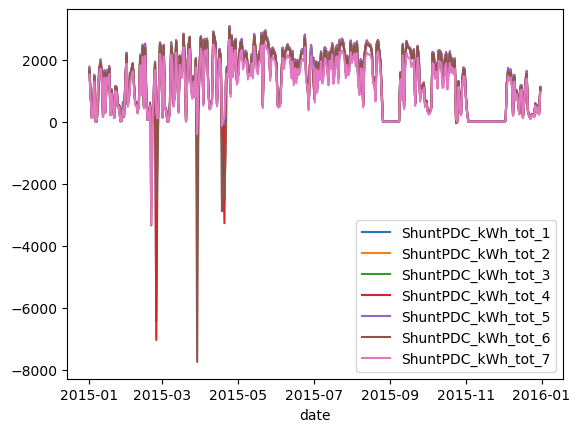

In [154]:
dfgr.plot("date", kwh_cols)

In [156]:
atleast0 = (dfgr[kwh_cols] >= 0)
atleast0

,ShuntPDC_kWh_tot_1,ShuntPDC_kWh_tot_2,ShuntPDC_kWh_tot_3,ShuntPDC_kWh_tot_4,ShuntPDC_kWh_tot_5,ShuntPDC_kWh_tot_6,ShuntPDC_kWh_tot_7
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
360,True,True,True,True,True,True,True
361,True,True,True,True,True,True,True
362,True,True,True,True,True,True,True
363,True,True,True,True,True,True,True


In [157]:
dfgr[kwh_cols] = dfgr[kwh_cols].where(atleast0, 0)

<Axes: xlabel='month'>

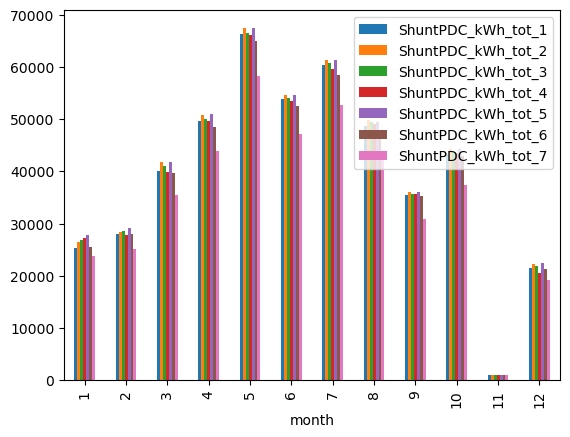

In [158]:
dfmo = dfgr[["month"]+ kwh_cols].groupby("month").sum().reset_index(drop=False)

dfmo.plot.bar("month", kwh_cols)

In [159]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
months_dict = {i+1:m for (i,m) in enumerate(months)}
months_dict

{1: 'Jan',
 2: 'Feb',
 3: 'Mar',
 4: 'Apr',
 5: 'May',
 6: 'Jun',
 7: 'Jul',
 8: 'Aug',
 9: 'Sep',
 10: 'Oct',
 11: 'Nov',
 12: 'Dec'}

In [160]:
dfmo["month"] = dfmo["month"].replace(months_dict)


In [161]:
dfmo["month"]

0     Jan
1     Feb
2     Mar
3     Apr
4     May
5     Jun
6     Jul
7     Aug
8     Sep
9     Oct
10    Nov
11    Dec
Name: month, dtype: object

In [162]:
strings = [f"String {i+1}" for (i,_) in enumerate(kwh_cols)]
strings

['String 1',
 'String 2',
 'String 3',
 'String 4',
 'String 5',
 'String 6',
 'String 7']

In [163]:
string_rename_dict = {k:s for (k,s) in zip(kwh_cols, strings)}
string_rename_dict

{'ShuntPDC_kWh_tot_1': 'String 1',
 'ShuntPDC_kWh_tot_2': 'String 2',
 'ShuntPDC_kWh_tot_3': 'String 3',
 'ShuntPDC_kWh_tot_4': 'String 4',
 'ShuntPDC_kWh_tot_5': 'String 5',
 'ShuntPDC_kWh_tot_6': 'String 6',
 'ShuntPDC_kWh_tot_7': 'String 7'}

In [164]:
dfmo = dfmo.rename(columns=string_rename_dict)
dfmo

,month,String 1,String 2,String 3,String 4,String 5,String 6,String 7
0,Jan,25365.063333,26494.482167,26819.717000,27195.575500,27755.448000,25566.449000,23728.627167
1,Feb,27993.797500,28440.631333,28519.766833,27808.839500,29236.589333,27949.239500,25074.574833
2,Mar,39996.878333,41708.686000,41051.859000,39864.816333,41873.991333,39753.223000,35531.279000
3,Apr,49613.168667,50861.982500,50108.848500,49656.985000,50965.202167,48446.488667,44001.189167
4,May,66263.638167,67405.306000,66603.705000,66096.987167,67505.366167,65053.487000,58254.510167
5,Jun,53815.505833,54620.403167,54043.936833,53433.672500,54578.054167,52552.862667,47078.932833
6,Jul,60350.872500,61357.757167,60789.436667,59696.863167,61274.900333,58544.060667,52786.709833
7,Aug,48734.100167,49801.366167,49396.483833,49074.403333,49383.205833,47945.518667,42714.298500
8,Sep,35449.503000,35992.553000,35644.392333,35752.682167,36070.903667,35338.396167,30784.567000
9,Oct,43409.474000,44235.983000,43751.720167,43494.460833,44335.011333,42925.697333,37476.565833


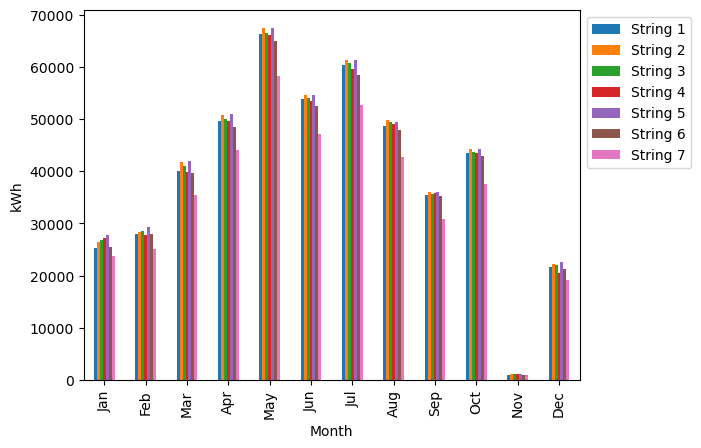

In [165]:
dfmo.plot.bar("month", strings, xlabel="Month", ylabel="kWh").legend(bbox_to_anchor=(1.0, 1.0))